<a href="https://colab.research.google.com/github/Akshay-Malwade/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

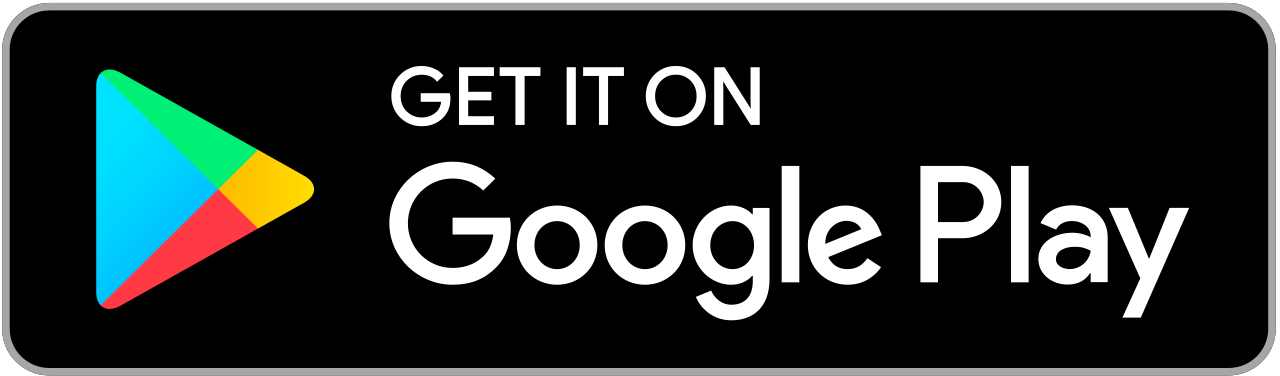

### **INTRODUCTION TO DATA**

Firstly let's get to know data. Initially to have lookup over the data we need pandas library.

In [2]:
#Importing necesssary libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
# word cloud library
from wordcloud import WordCloud

In [3]:
# Mount drive with google colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**1. Loading the Playstore Dataset**

In [4]:
data = pd.read_csv('/content/drive/MyDrive/EDA Capstone -1/Play Store Data.csv') # loaded data into pandas dataframe.

In [5]:
data.info() # This shows the datatype of each feature and also we get to know if any missing values are present in each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
data.columns=[str(x).lower().replace(" ","_") for x in data.columns] # this will convert all feature names to lowercase.

In [7]:
data.columns # Displays all the columns from dataset.

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object')

In [8]:
data.shape # displays the total no of rows and columns present in dataset.

(10841, 13)

In [9]:
type(data) # type of the variable named data

pandas.core.frame.DataFrame

In [10]:
data.head() #displays the first five instances.

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
data.tail() #displays the last five instances.

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [12]:
data.isnull().sum()

app                  0
category             0
rating            1474
reviews              0
size                 0
installs             0
type                 1
price                0
content_rating       1
genres               0
last_updated         0
current_ver          8
android_ver          3
dtype: int64

As we can explicitly see that there are 1474 missing values in rating columns. We have to fill these values with proper calculation. . But the question is how to handle the rating columns because we can not assign those as median, mean, or mode as in real life ratings are given by the customers, We are now using forward linear interpolation to fill nan values inside the rating column.

In [13]:
# Missing Value Handling using interpolate forward linear method.
data.interpolate(method='linear',limit_direction='forward',inplace=True)

In [14]:
data.isnull().sum()

app               0
category          0
rating            0
reviews           0
size              0
installs          0
type              1
price             0
content_rating    1
genres            0
last_updated      0
current_ver       8
android_ver       3
dtype: int64

As we can see that there is no Nan value present in rating column. But, there are some NaN values present in type, last_updated,current_ver,android_ver column so now we need to deal with these nan values and replace them using appropriate method.

In [15]:
# Filling NAN with suitable values
data['content_rating'].fillna(value='Everyone',inplace=True)
data['type'].fillna(value='Free',inplace=True)

### **2. Cleaning Data**
Dataset can contain missing data, numerical string value, various cues. Cleaning helps us to make data analysis in easy way.
So, Let's explore all columns one by one and check for invalid data and then clean the data accordingly.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             10841 non-null  object 
 1   category        10841 non-null  object 
 2   rating          10841 non-null  float64
 3   reviews         10841 non-null  object 
 4   size            10841 non-null  object 
 5   installs        10841 non-null  object 
 6   type            10841 non-null  object 
 7   price           10841 non-null  object 
 8   content_rating  10841 non-null  object 
 9   genres          10841 non-null  object 
 10  last_updated    10841 non-null  object 
 11  current_ver     10833 non-null  object 
 12  android_ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### **APP Column:**
Check for duplicate values in App column if any then drop those rows.

In [17]:
data['app'].value_counts() ## Returns the count of all the unique values for app column.


ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Candy Crush Saga                                      7
8 Ball Pool                                           7
                                                     ..
EY TaxLaw NL                                          1
Gâteau au yaourt                                      1
Five Nights at Freddy's 4                             1
Paprika Recipe Manager                                1
20WPM Amateur ham radio Koch CW Morse code trainer    1
Name: app, Length: 9660, dtype: int64

In [18]:
# remove the duplicate values from the dataframe, specifying the column name in the subset parameter 
data = data.drop_duplicates(subset=['app'], keep = 'first')

In [19]:
data['app'].value_counts() # for Rechecking.

Age of Conquest: N. America                           1
Trinity Church Deltona, FL                            1
Number Counting games for toddler preschool kids      1
AZ REMOTE CONTROL                                     1
EG | Explore Folegandros                              1
                                                     ..
FD CANNECT                                            1
The CW TV app                                         1
Mitchell AH                                           1
DX Alert                                              1
20WPM Amateur ham radio Koch CW Morse code trainer    1
Name: app, Length: 9660, dtype: int64

In [20]:
# Recheck the shape of the data to validate the updation.
data.shape

(9660, 13)

### **Category Column:**
Check for unique categories.

In [21]:
data['category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

As we can see 1.9 is wrong category present in dataset which we is invalid.So, Need to check the observation entry for that category.


In [22]:
data[data.category == '1.9']

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,NaN


So, Here we got the index position for that particular wrong entry.
So, lets remove it.

In [23]:
# remove the row with the specified index; axis 0 implies along the rows; axis 1 along the columns
data=data.drop([10472],axis=0)

In [24]:
data.shape

(9659, 13)

## Rating Column:
Check for valid rating values.

In [25]:
data['rating'].describe() # statistical summary of the rating column.

count    9659.000000
mean        4.174775
std         0.536124
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

As we have seen descriptive summery of rating column so it has well normally distributed data.

### **Review Column:**
Check for any non numeric values if any replace it and convert it to a numeric column

In [26]:
# displays frequency measures for a non-numerical column
data.reviews.describe()    # The datatype for the reviews column is string 

count     9659
unique    5330
top          0
freq       593
Name: reviews, dtype: object

In [27]:
# check for any non numeric value 
data.reviews.str.isnumeric().sum() 

9659

In [28]:
# convert the 'Review' column to numeric
data.reviews=pd.to_numeric(data.reviews) 

In [29]:
# statistical summary of the specified numerical variable
data.reviews.describe()

count    9.659000e+03
mean     2.165926e+05
std      1.831320e+06
min      0.000000e+00
25%      2.500000e+01
50%      9.670000e+02
75%      2.940100e+04
max      7.815831e+07
Name: reviews, dtype: float64

So, Here we can observe that the data type has changed to float. And hence, we are able to see complete statistical summary of review column. 

### **Size Column:**

In the 'Size' column we have the values as '20M' and '10K' which represents the size of app in MB and KB respectively. So replace 'M' and 'K' with their equivalent numeric values in bytes.

In [30]:
data['size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: size, Length: 9659, dtype: object

In [31]:
#get the count/frequency of all the unique values of the specified column
data['size'].value_counts()

Varies with device    1227
11M                    182
12M                    181
14M                    177
13M                    177
                      ... 
518k                     1
862k                     1
643k                     1
412k                     1
414k                     1
Name: size, Length: 461, dtype: int64

In [32]:
data['size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: size, Length: 9659, dtype: object

In [33]:
# replace all the 'Varies with device' with 0
data['size']= data['size'].apply(lambda x: x.replace('Varies with device','0') if 'Varies with device' in x else x)

# replace all the 'k' representing thousand
data['size'] = data['size'].apply(lambda x: x.replace('k','') if 'k' in x else x)

# replace all the 'M' representing Million with 3 zeroes
data['size'] = data['size'].apply(lambda x: float(x.replace('M',''))*1024 if 'M' in x else x)

In [34]:
# convert to float datatype
data['size'] = data['size'].apply(lambda x: float(x))

In [35]:
data['size']

0        19456.0
1        14336.0
2         8908.8
3        25600.0
4         2867.2
          ...   
10836    54272.0
10837     3686.4
10838     9728.0
10839        0.0
10840    19456.0
Name: size, Length: 9659, dtype: float64

In [36]:
# statistical summary of the specified numerical variable
data['size'].describe()

count      9659.000000
mean      18231.394834
std       22011.410257
min           0.000000
25%        2969.600000
50%        9318.400000
75%       25600.000000
max      102400.000000
Name: size, dtype: float64

In [37]:
data=data.rename(columns={'size':'size_in_KB'})   # rename the Size column to Size_in_KB 

### **Installs column:**

The Installs column shows the number of installations for an app. The values consists of '+' and ',' characters. So remove '+' and ',' present in Installs column and convert it to numeric.

In [38]:
data.installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: installs, Length: 9659, dtype: object

In [39]:
# values are given as, for example, '1,000+'. Removes the '+' sign from the end of the string
data.installs=data.installs.apply(lambda x: x.strip('+'))

# numbers have commas in them, for eg., 100,000. Removes all the commas from the strings.
data.installs=data.installs.apply(lambda x: x.replace(',',''))

# get the count/frequency of all the unique values of the specified column
data.installs.value_counts()

1000000       1417
100000        1112
10000         1031
10000000       937
1000           888
100            710
5000000        607
500000         505
50000          469
5000           468
10             385
500            328
50             204
50000000       202
100000000      188
5               82
1               67
500000000       24
1000000000      20
0               15
Name: installs, dtype: int64

In [40]:
# convert to numeric datatype
data.installs=pd.to_numeric(data.installs)

In [41]:
data['installs'].describe()

count    9.659000e+03
mean     7.777507e+06
std      5.375828e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: installs, dtype: float64

### **Exploratory Data Analysis**
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [42]:
# importing plotly library for visualisation
import plotly.express as px

In [43]:
# Distribution of average app rating as per their category
average_rating=data.groupby(['category','type'],as_index=False)['rating'].median()

In [44]:
# Applying a format with the help of lambda function to restrict the decimal points in rating column
average_rating['rating']=average_rating['rating'].apply(lambda x:"{0:1.1f}".format(x))

In [45]:
# Plotting a bar plot using plotly for average rating per category
px.bar(data_frame=average_rating,x='category',y='rating',text='rating',
       title='Average Rating comparison Between Free vs Paid Applications In Each Category (Category Vs Rating)',color='type')

In [46]:
# Printing the overall mean of the rating for all the categories in play store data
print(f"The average rating for each category is around {round(np.mean(data['rating']),1)} out of 5")

The average rating for each category is around 4.2 out of 5


We can clearly observed from above plot that overall avg. rating is 4.2 out of 5. Also we would be able to compare the difference between rating for Free and Paid applications for each individual category.

In [49]:
# Let's see how application size affects the number of rating
px.scatter(data_frame=data,x='rating',y='size_in_KB',color='size_in_KB',
           title="Scatter Plot Representing the effect of size on the number of rating (Rating Vs size_in_KB)")

From Above scatter plot we can conclude that there are more dense dots are found in lower right bottom. Hence, we can say that the apps which are lesser in size have higher rating as compared to larger sized apps.

In [50]:
# Let's have a look at reviews vs rating
px.scatter(data_frame=data[data['reviews']<100000],x='reviews',y='rating',trendline='ols',color='rating',
           title='Scatter Plot With Trendline Represents Reviews Vs Rating',text='rating')

As we can see that rating and reviews are directly proportional to each other. Because, low rated apps have less amount of reviews and vice-versa.